In [7]:
import pandas as pd

def load_movielens_1m(path="data\ml-1m"):
    # Load ratings
    ratings = pd.read_csv(
        f"{path}ratings.dat",
        sep="::",
        engine="python",
        names=["userId", "movieId", "rating", "timestamp"]
    )

    # Load movies
    movies = pd.read_csv(
        f"{path}movies.dat",
        sep="::",
        engine="python",
        names=["movieId", "title", "genres"],
        encoding="latin-1"
    )

    # Load users
    users = pd.read_csv(
        f"{path}users.dat",
        sep="::",
        engine="python",
        names=["userId", "gender", "age", "occupation", "zip"]
    )

    return ratings, movies, users


path = r"C:\Users\atalb\Documents\Coding\MLandAI\MLProjects\MovieRecommender\data\ml-1m\\"
# Example usage
ratings, movies, users = load_movielens_1m(path=path)
print(ratings.head())
print(movies.head())
print(users.head())


   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   userId gender  age  occupation    zip
0       1      F    1          10  48067
1       2      M   56          16  70072
2       3      M   25          15  55117
3       4      M   45           7  02460
4       5      M   25          20  55455


In [19]:
print("Shapes:")
print(" ratings:", ratings.shape)
print(" movies: ", movies.shape)
print(" users:  ", users.shape)
print("\nratings dtypes:\n", ratings.dtypes)
print("\nFirst 3 ratings rows:\n", ratings.head(3))
print("\nFirst 3 movies rows:\n", movies.head(3))
print("\nFirst 3 users rows:\n", users.head(3))

Shapes:
 ratings: (1000209, 4)
 movies:  (3883, 3)
 users:   (6040, 5)

ratings dtypes:
 userId       int64
movieId      int64
rating       int64
timestamp    int64
dtype: object

First 3 ratings rows:
    userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968

First 3 movies rows:
    movieId                    title                        genres
0        1         Toy Story (1995)   Animation|Children's|Comedy
1        2           Jumanji (1995)  Adventure|Children's|Fantasy
2        3  Grumpier Old Men (1995)                Comedy|Romance

First 3 users rows:
    userId gender  age  occupation    zip
0       1      F    1          10  48067
1       2      M   56          16  70072
2       3      M   25          15  55117


In [20]:
print("\nMissing values (per dataframe):")
print("ratings:\n", ratings.isnull().sum())
print("movies:\n", movies.isnull().sum())
print("users:\n", users.isnull().sum())


Missing values (per dataframe):
ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movies:
 movieId    0
title      0
genres     0
dtype: int64
users:
 userId        0
gender        0
age           0
occupation    0
zip           0
dtype: int64


In [22]:
# Duplicates
print("\nDuplicates checks:")
print("ratings duplicate rows:", ratings.duplicated().sum())
print("movies duplicate movieId:", movies['movieId'].duplicated().sum())
print("movies duplicate titles:", movies['title'].duplicated().sum())
print("users duplicate userId:", users['userId'].duplicated().sum())



Duplicates checks:
ratings duplicate rows: 0
movies duplicate movieId: 0
movies duplicate titles: 0
users duplicate userId: 0


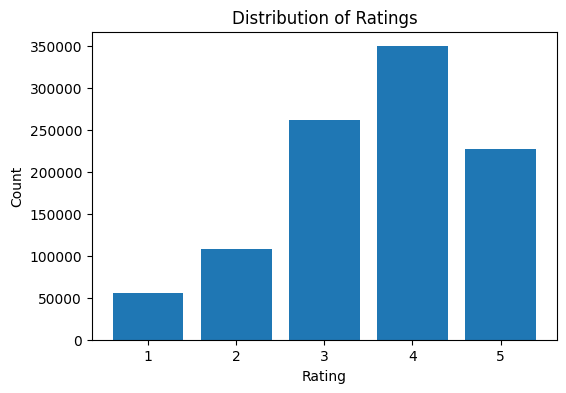

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
plt.hist(ratings['rating'], bins=np.arange(0.5, 5.5+1e-6, 1), rwidth=0.8)
plt.xticks([1,2,3,4,5])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

In [24]:
print("\nRatings summary:")
print(ratings['rating'].describe())


Ratings summary:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [25]:
rpu = ratings.groupby('userId').size().rename("num_ratings")
print("\nRatings per user summary:")
print(rpu.describe())


Ratings per user summary:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: num_ratings, dtype: float64
